In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
import math

In [2]:
get_ipython().run_line_magic('matplotlib', 'inline')

In [3]:
class Model(nn.Module):
    def __init__(self,in_features=4,h1=8,h2=9,out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)
        self.fc2 = nn.Linear(h1,h2)
        self.out = nn.Linear(h2,out_features)
        
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [4]:
torch.manual_seed(3)
model = Model()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [11]:
class IrisDataset(Dataset):
    def __init__(self):
        df = pd.read_csv('iris.csv')
        X=df.drop('target',axis=1).values
        y = df['target'].values
        
        X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=123)
        
        self.x_data = torch.FloatTensor(X_train)
        self.x_test = torch.FloatTensor(X_test)
        self.y_data = torch.LongTensor(y_train)
        self.y_test = torch.LongTensor(X_test)
        
        self.datalen = len(self.y_data)
        
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]
    
    def __len__(self):
        return self.datalen

In [12]:
Batch_Size = 20
dataset = IrisDataset()
trainloader = DataLoader(dataset=dataset, batch_size = Batch_Size, shuffle=True)

In [13]:
epochs = 100
loss_list = []
total_samples = len(dataset)
print(total_samples)
n_iterations=math.ceil(total_samples/Batch_Size)
print(n_iterations)

120
6


In [14]:
for epoch in range(epochs):
    for i, data in enumerate(trainloader):
        inputs, labels = data
        print(f'Epoch:{epoch+1}/{epochs}, Iteration {i+1}/{n_iterations},Inputs {inputs.shape}, Labels {labels.shape}')
        y_pred = model.forward(inputs.data)
        loss = criterion(y_pred, labels.data)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        loss_list.append(loss)

Epoch:1/100, Iteration 1/6,Inputs torch.Size([20, 4]), Labels torch.Size([20])
Epoch:1/100, Iteration 2/6,Inputs torch.Size([20, 4]), Labels torch.Size([20])
Epoch:1/100, Iteration 3/6,Inputs torch.Size([20, 4]), Labels torch.Size([20])
Epoch:1/100, Iteration 4/6,Inputs torch.Size([20, 4]), Labels torch.Size([20])
Epoch:1/100, Iteration 5/6,Inputs torch.Size([20, 4]), Labels torch.Size([20])
Epoch:1/100, Iteration 6/6,Inputs torch.Size([20, 4]), Labels torch.Size([20])
Epoch:2/100, Iteration 1/6,Inputs torch.Size([20, 4]), Labels torch.Size([20])
Epoch:2/100, Iteration 2/6,Inputs torch.Size([20, 4]), Labels torch.Size([20])
Epoch:2/100, Iteration 3/6,Inputs torch.Size([20, 4]), Labels torch.Size([20])
Epoch:2/100, Iteration 4/6,Inputs torch.Size([20, 4]), Labels torch.Size([20])
Epoch:2/100, Iteration 5/6,Inputs torch.Size([20, 4]), Labels torch.Size([20])
Epoch:2/100, Iteration 6/6,Inputs torch.Size([20, 4]), Labels torch.Size([20])
Epoch:3/100, Iteration 1/6,Inputs torch.Size([20, 4]

Epoch:18/100, Iteration 4/6,Inputs torch.Size([20, 4]), Labels torch.Size([20])
Epoch:18/100, Iteration 5/6,Inputs torch.Size([20, 4]), Labels torch.Size([20])
Epoch:18/100, Iteration 6/6,Inputs torch.Size([20, 4]), Labels torch.Size([20])
Epoch:19/100, Iteration 1/6,Inputs torch.Size([20, 4]), Labels torch.Size([20])
Epoch:19/100, Iteration 2/6,Inputs torch.Size([20, 4]), Labels torch.Size([20])
Epoch:19/100, Iteration 3/6,Inputs torch.Size([20, 4]), Labels torch.Size([20])
Epoch:19/100, Iteration 4/6,Inputs torch.Size([20, 4]), Labels torch.Size([20])
Epoch:19/100, Iteration 5/6,Inputs torch.Size([20, 4]), Labels torch.Size([20])
Epoch:19/100, Iteration 6/6,Inputs torch.Size([20, 4]), Labels torch.Size([20])
Epoch:20/100, Iteration 1/6,Inputs torch.Size([20, 4]), Labels torch.Size([20])
Epoch:20/100, Iteration 2/6,Inputs torch.Size([20, 4]), Labels torch.Size([20])
Epoch:20/100, Iteration 3/6,Inputs torch.Size([20, 4]), Labels torch.Size([20])
Epoch:20/100, Iteration 4/6,Inputs torch

Epoch:54/100, Iteration 4/6,Inputs torch.Size([20, 4]), Labels torch.Size([20])
Epoch:54/100, Iteration 5/6,Inputs torch.Size([20, 4]), Labels torch.Size([20])
Epoch:54/100, Iteration 6/6,Inputs torch.Size([20, 4]), Labels torch.Size([20])
Epoch:55/100, Iteration 1/6,Inputs torch.Size([20, 4]), Labels torch.Size([20])
Epoch:55/100, Iteration 2/6,Inputs torch.Size([20, 4]), Labels torch.Size([20])
Epoch:55/100, Iteration 3/6,Inputs torch.Size([20, 4]), Labels torch.Size([20])
Epoch:55/100, Iteration 4/6,Inputs torch.Size([20, 4]), Labels torch.Size([20])
Epoch:55/100, Iteration 5/6,Inputs torch.Size([20, 4]), Labels torch.Size([20])
Epoch:55/100, Iteration 6/6,Inputs torch.Size([20, 4]), Labels torch.Size([20])
Epoch:56/100, Iteration 1/6,Inputs torch.Size([20, 4]), Labels torch.Size([20])
Epoch:56/100, Iteration 2/6,Inputs torch.Size([20, 4]), Labels torch.Size([20])
Epoch:56/100, Iteration 3/6,Inputs torch.Size([20, 4]), Labels torch.Size([20])
Epoch:56/100, Iteration 4/6,Inputs torch

Epoch:76/100, Iteration 3/6,Inputs torch.Size([20, 4]), Labels torch.Size([20])
Epoch:76/100, Iteration 4/6,Inputs torch.Size([20, 4]), Labels torch.Size([20])
Epoch:76/100, Iteration 5/6,Inputs torch.Size([20, 4]), Labels torch.Size([20])
Epoch:76/100, Iteration 6/6,Inputs torch.Size([20, 4]), Labels torch.Size([20])
Epoch:77/100, Iteration 1/6,Inputs torch.Size([20, 4]), Labels torch.Size([20])
Epoch:77/100, Iteration 2/6,Inputs torch.Size([20, 4]), Labels torch.Size([20])
Epoch:77/100, Iteration 3/6,Inputs torch.Size([20, 4]), Labels torch.Size([20])
Epoch:77/100, Iteration 4/6,Inputs torch.Size([20, 4]), Labels torch.Size([20])
Epoch:77/100, Iteration 5/6,Inputs torch.Size([20, 4]), Labels torch.Size([20])
Epoch:77/100, Iteration 6/6,Inputs torch.Size([20, 4]), Labels torch.Size([20])
Epoch:78/100, Iteration 1/6,Inputs torch.Size([20, 4]), Labels torch.Size([20])
Epoch:78/100, Iteration 2/6,Inputs torch.Size([20, 4]), Labels torch.Size([20])
Epoch:78/100, Iteration 3/6,Inputs torch

Epoch:97/100, Iteration 4/6,Inputs torch.Size([20, 4]), Labels torch.Size([20])
Epoch:97/100, Iteration 5/6,Inputs torch.Size([20, 4]), Labels torch.Size([20])
Epoch:97/100, Iteration 6/6,Inputs torch.Size([20, 4]), Labels torch.Size([20])
Epoch:98/100, Iteration 1/6,Inputs torch.Size([20, 4]), Labels torch.Size([20])
Epoch:98/100, Iteration 2/6,Inputs torch.Size([20, 4]), Labels torch.Size([20])
Epoch:98/100, Iteration 3/6,Inputs torch.Size([20, 4]), Labels torch.Size([20])
Epoch:98/100, Iteration 4/6,Inputs torch.Size([20, 4]), Labels torch.Size([20])
Epoch:98/100, Iteration 5/6,Inputs torch.Size([20, 4]), Labels torch.Size([20])
Epoch:98/100, Iteration 6/6,Inputs torch.Size([20, 4]), Labels torch.Size([20])
Epoch:99/100, Iteration 1/6,Inputs torch.Size([20, 4]), Labels torch.Size([20])
Epoch:99/100, Iteration 2/6,Inputs torch.Size([20, 4]), Labels torch.Size([20])
Epoch:99/100, Iteration 3/6,Inputs torch.Size([20, 4]), Labels torch.Size([20])
Epoch:99/100, Iteration 4/6,Inputs torch

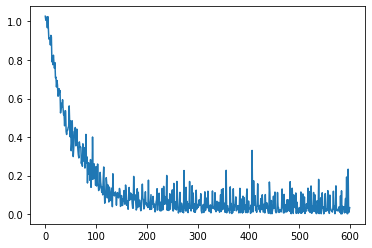

In [15]:
plt.plot(loss_list)